# Plots for the Report

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Strong Scaling

## Dataset 1
Dataset: 2, 4, 8, 16, 32, 64, 128 MB

### Sequential

In [7]:
# Sequential times for 5 runs (file: outputs/output_seq_49758.txt)
seq_times = [14.9707, 14.1369, 14.1449, 14.1483, 14.0993]
seq_avg = np.mean(seq_times)

print(seq_avg)

14.30002


### FastFlow

In [27]:
# COMPRESSION 

def parse_data(file_content):
    # Initialize an empty dictionary to store data for each combination of l and r
    data = {}

    # Process each line in the file
    for line in file_content:
        # Only care about 'Compression' lines
        if line.startswith("Compression"):
            # Split the line into components
            parts = line.split(",")
            l = int(parts[1])
            r = int(parts[2])
            time = float(parts[3])

            # Add data to the dictionary
            if l not in data:
                data[l] = {}
            if r not in data[l]:
                data[l][r] = []
            data[l][r].append(time)
    
    return data

# Function to calculate the average of each combination of l and r
def average_data(data):
    avg_data = {}
    for l in data:
        avg_data[l] = {}
        for r in data[l]:
            avg_data[l][r] = np.mean(data[l][r])
    return avg_data

# Define the function to plot the data
def plot_compression_data(avg_data):
    plt.figure(figsize=(10, 6))

    # Plot the average compression time for each value of l
    for l in avg_data:
        r_values = sorted(avg_data[l].keys())  # Get sorted r values
        avg_times = [avg_data[l][r] for r in r_values]
        plt.plot(r_values, avg_times, label=f"Lw = {l}")

    # Add the sequential time to the plot
    plt.axhline(y=seq_avg, color='r', linestyle='--', label="Sequential")

    # Customize the plot
    plt.xlabel("Right Workers")
    plt.ylabel("Compression Time (seconds)")
    plt.title("Average Compression Time over 5 runs")
    plt.legend(title="Left Workers")
    # Light grid
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

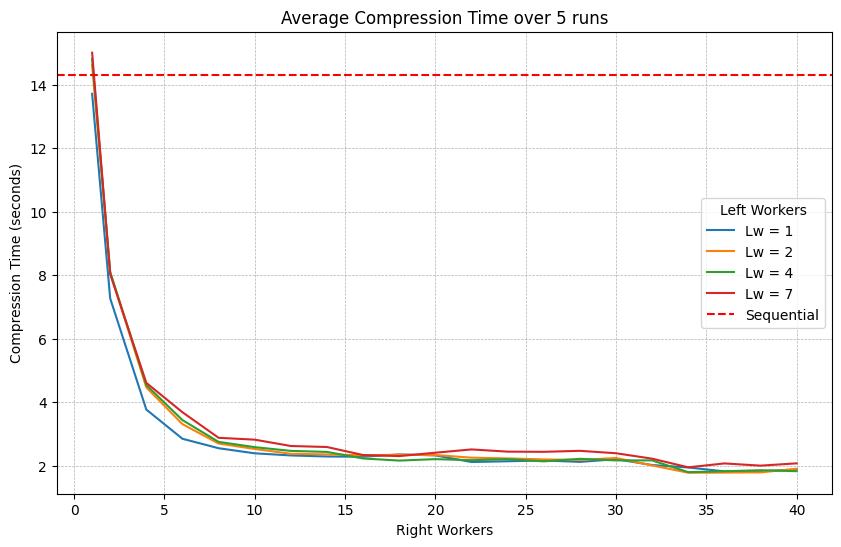

In [28]:
# Consider outputs/output_ff_49770.txt and outputs/output_ff_49794.txt (merge them)
file_content = []
file1 = open("outputs/output_ff_49770.txt", "r")
file2 = open("outputs/output_ff_49794.txt", "r")
file_content += file1.readlines()
file_content += file2.readlines()

# Parsing the data
data = parse_data(file_content)

# Averaging the data
avg_data = average_data(data)

# Plot the data
plot_compression_data(avg_data)

In [14]:
# Print the config for which the time is minimum
min_time = float('inf')
min_l = 0
min_r = 0
for l in avg_data:
    for r in avg_data[l]:
        if avg_data[l][r] < min_time:
            min_time = avg_data[l][r]
            min_l = l
            min_r = r
print(f"Minimum time: {min_time} for l={min_l}, r={min_r}")

Minimum time: 1.786146 for l=2, r=34


# Weak Scaling